# São Paulo Real Estate - Data Science Study

Predict the median sale/rent price of apartments in the city of São Paulo, Brazil.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Bandeira_da_cidade_de_S%C3%A3o_Paulo.svg/320px-Bandeira_da_cidade_de_S%C3%A3o_Paulo.svg.png">

**Sprint #1**

**Created by:** Vinícius Albano ([@vinialbano](https://github.com/vinialbano))

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

***

## Before starting this notebook

This jupyter notebook is designed for **experimental and learning purposes.**
Although it is (relatively) well organized, it aims at solving the _target problem_ by evaluating (and documenting) _different solutions_ for some steps of the **machine learning pipeline** - see the ***[Machine Learning Project Checklist by xavecoding](https://github.com/xavecoding/IFSP-CMP-D2APR-2021.2/blob/main/cheat-sheets/machine-learning-project-checklist_by_xavecoding.pdf).***
I tried to make this notebook as literally a _notebook_. Thus, it contains notes, drafts, comments, etc.

For learning purposes, some parts of the notebook may be _overcommented._ Moreover, to simulate a real development scenarion, we will divide our solution and experiments into "**sprints**" in which each sprint has some goals (e.g., perform _feature selection_, train more ML models, ...).
The **sprint goal** wil be stated at the beginning of the notebook.

A ***final notebook*** (or any other kind of presentation) that complies and summarizes all sprint – the target problem, solutions, and findings – should be created later.

**Conventions**

* 💡 indicates a tip.
* ⚠️ indicates a warning message.
* alt tab indicates an extra content (e.g., slides) to explain a given concept.

***

## Sprint Goals

* Frame the problem
* Get the data
* Data cleaning
* Simple EDA to gain insights
* Initial data preprocessing
* Train a (single) ML algorithm with all features and default hyperparameters

***

## 0. Imports and default settings for plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 1. Frame the Problem

## 2. Get the Data

The considered dataset contains information on 13,000 apartments for sale and rent in the city of São Paulo, Brazil. It represents properties advertised in April 2019, whose data came from various sources, especially real estate classifieds websites.

As the dataset is not recent, it **should not** be used to predict current prices for rent/sale of apartments in São Paulo; more recent data should be used instead. However, it is excellent for learning and simulating a real case.

This dataset does not have legal obligations and sensitive information.

### 2.1. Download the Data

We previously downloaded the dataset from this [Kaggle repository](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019). However, we could use pandas to read such a remote file directly.

### 2.2. Load the Data

In [2]:
import pandas as pd
df = pd.read_csv('./datasets/sao-paulo-properties-april-2019.csv')

In [3]:
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


### 2.3. Take a quick look at the data structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

Each row corresponds to an apartment available for sale or rent.

Each apartment is represented by **16 attributes** (9 numeric and 7 categorical).

* Apartment's location: ***District, Latitude, Longitude***.
* ***Price***: Advertised price of the apartment (measured in Brazilian Real).
* ***Condo***: Comdominium expenses (unknown values are marked as zero).
* ***Size***: The property size (measured in Square Meters).
* ***Rooms***: Total number of bedrooms.
* ***Toilets***: Total number of toilets.
* ***Parking***: Number of parking spots.
* ***Elevator***: Whether there is an elevator in the building, or not (binary values).
* ***Furnished***: Whether the property is furnished, or not (binary values).
* ***Swimming Pool***: Whether the property has a swimming pool, or not (binary values).
* ***New***: Whether the property was built recently, or not (binary values).
* ***Negotiation Type***: If it is available for sale or for rent.
* ***Property Type***: The type of the property.

There are **13640 instances** in the dataset, with **no missing features**.

In [5]:
# Fixing data types
df['Elevator'] = df['Elevator'].astype('bool')
df['Furnished'] = df['Furnished'].astype('bool')
df['Swimming Pool'] = df['Swimming Pool'].astype('bool')
df['New'] = df['New'].astype('bool')
df['District'] = df['District'].astype('category')
df['Negotiation Type'] = df['Negotiation Type'].astype('category')

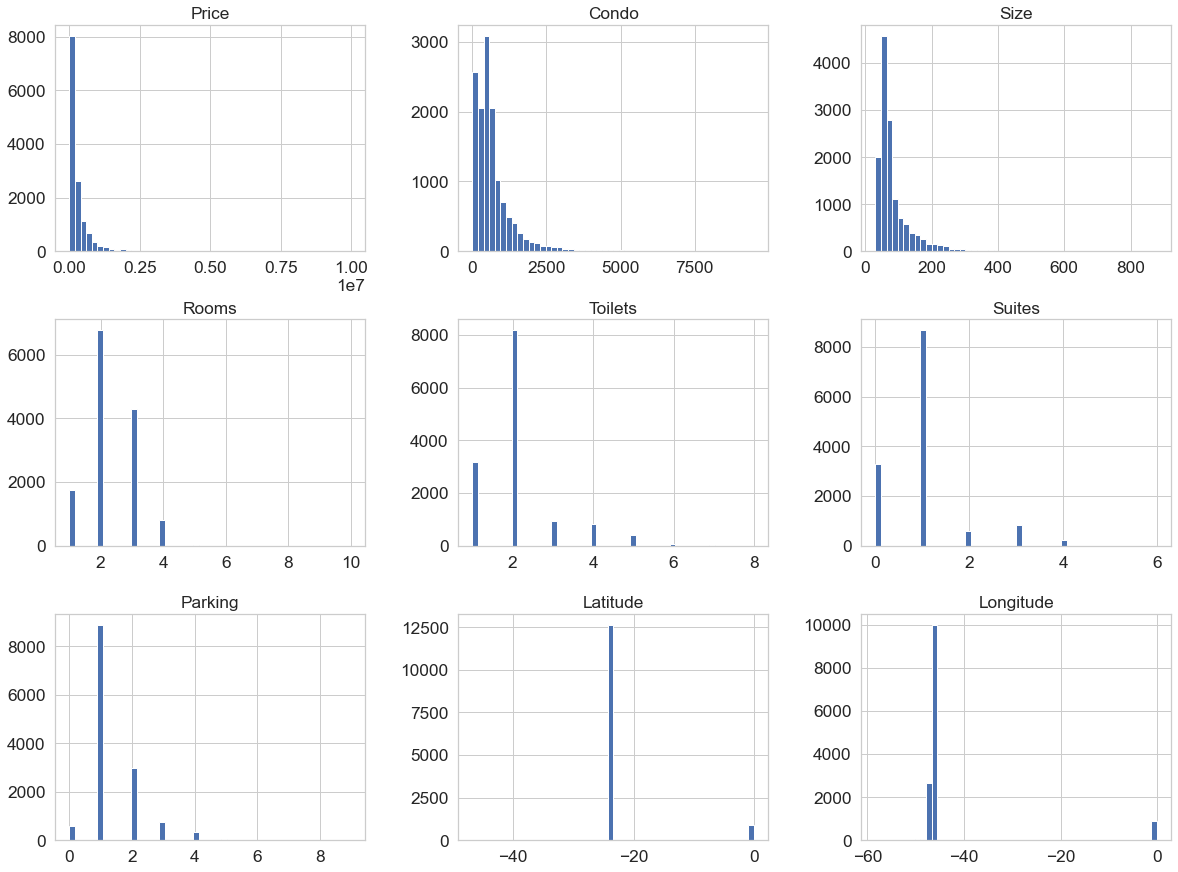

In [6]:
# plot a histogram for each numeric attribute from the database
df.hist(bins=50, figsize=(20,15))
display()

1. The price range is huge, varying from a near-zero value to about R$ 1 million. It may be due to the Negotiation Type variable, since **some prices refer to a rent value and others refer to sale**. We need to check this variable in more details.

2. According to the [São Paulo Environmental System](http://datageo.ambiente.sp.gov.br/geoportal/catalog/search/resource/details.page?uuid=%7B10787319-DEDC-42F7-BB0A-36CA918C4B82%7D), the geographic coordinates of the city varies inside the following ranges:
* West Longitude: -46.84
* East Longitude: -46.36
* North Latitude: -23.36
* South Latitude: -24.00

We can see that there are some **outliers in the Latitude and Longitude attributes**, since some instances have values close to or equal to zero. There may be other incorrect values as well.

3. The variables _Elevator_, _Furnished_, _Swimming Pool_ and _New_ are binary. We might transform them to categorical if necessary.

4. The numerical attributes have very different scales.

5. Many histograms are _tail-heavy_.

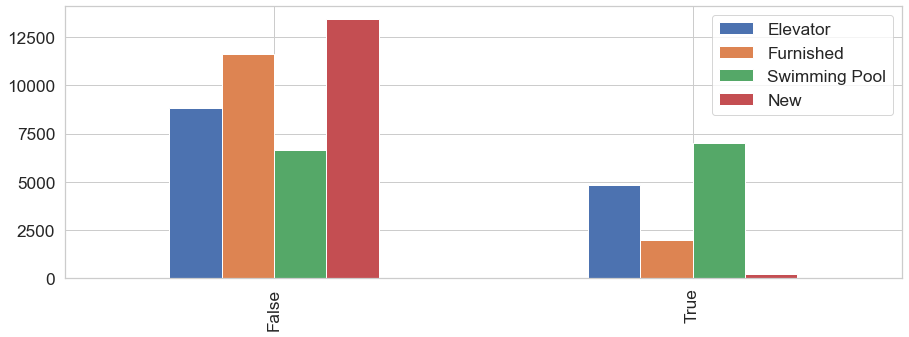

In [7]:
# plot a barplot for each boolean attribute from the database
df[['Elevator', 'Furnished', 'Swimming Pool', 'New']].apply(pd.value_counts).plot.bar()
display()

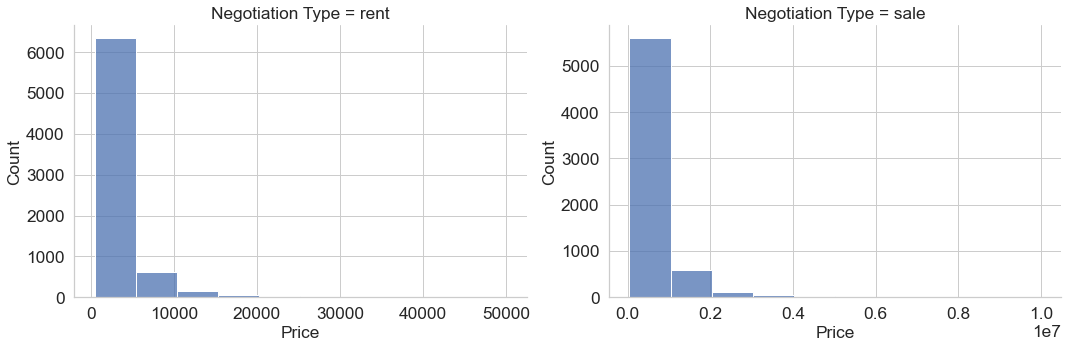

In [8]:
# Checking the price range difference between Negotiation Types
g = sns.FacetGrid(df, col='Negotiation Type', sharex=False, sharey=False, height=5, aspect=1.5)
g.map_dataframe(sns.histplot, x='Price', bins=10)
display()

As expected, there is a big difference of prices between the apartments for rent and for sale. We need to consider this when we are creating our models.

In [9]:
# Describing the non-numerical features
df.describe(include='object')

,Property Type
count,13640
unique,1
top,apartment
freq,13640


The _Property Type_ attribute contains only one value that is "apartment". We are able to exclude this feature from the dataset.

In [10]:
# Checking for problems with the District attributes
df['District'].unique()

['Artur Alvim/São Paulo', 'Belém/São Paulo', 'Cangaíba/São Paulo', 'Carrão/São Paulo', 'Cidade Líder/São Paulo', ..., 'Mooca/São Paulo', 'Brooklin/São Paulo', 'Vila Olimpia/São Paulo', 'Perus/São Paulo', 'São Domingos/São Paulo']
Length: 96
Categories (96, object): ['Alto de Pinheiros/São Paulo', 'Anhanguera/São Paulo', 'Aricanduva/São Paulo', 'Artur Alvim/São Paulo', ..., 'Vila Olimpia/São Paulo', 'Vila Prudente/São Paulo', 'Vila Sônia/São Paulo', 'Água Rasa/São Paulo']

It seems that they all have the text "/São Paulo" in the end. We are able to remove that, since it's just noise.

### 2.4 Checking for duplicated samples

In [11]:
df.duplicated().any()

True

There are duplicated samples (rows) in our dataset. We should remove these samples in order to not add redundancy to our model.

Let's check some information about these rows:

In [12]:
df[df.duplicated()].head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
165,1300,387,50,2,2,1,1,False,False,False,False,Cidade Tiradentes/São Paulo,rent,apartment,-23.582576,-46.417478
203,999,0,70,2,2,1,1,False,False,False,False,Ermelino Matarazzo/São Paulo,rent,apartment,-23.494694,-46.478125
204,888,0,70,2,2,1,1,False,False,False,False,Ermelino Matarazzo/São Paulo,rent,apartment,-23.494694,-46.478125
207,8000,1400,132,3,2,1,1,False,False,False,False,Iguatemi/São Paulo,rent,apartment,-23.585672,-46.681216
208,8000,1400,132,3,2,1,1,False,False,False,False,Iguatemi/São Paulo,rent,apartment,-23.585672,-46.681216


In [13]:
# Checking the total duplicated rows
len(df[df.duplicated()])

319

**There are 319 duplicated samples**. We must remove them in our cleaning phase.

### 2.5 Removing useless information

Before we start a deeper analysis of our dataset and create a model, let's remove some redundancy.

* Remove the Property Type attribute, since it is unique for the whole dataset.
* Remove the duplicated rows, since they won't add any value for our study.

In [14]:
# Removing the Property Type column
df.drop(['Property Type'], axis=1, inplace=True)

In [15]:
# Removing the duplicated samples, keeping the first occurrence
df.drop_duplicates(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13321 entries, 0 to 13639
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             13321 non-null  int64   
 1   Condo             13321 non-null  int64   
 2   Size              13321 non-null  int64   
 3   Rooms             13321 non-null  int64   
 4   Toilets           13321 non-null  int64   
 5   Suites            13321 non-null  int64   
 6   Parking           13321 non-null  int64   
 7   Elevator          13321 non-null  bool    
 8   Furnished         13321 non-null  bool    
 9   Swimming Pool     13321 non-null  bool    
 10  New               13321 non-null  bool    
 11  District          13321 non-null  category
 12  Negotiation Type  13321 non-null  category
 13  Latitude          13321 non-null  float64 
 14  Longitude         13321 non-null  float64 
dtypes: bool(4), category(2), float64(2), int64(7)
memory usage: 1.1 MB


We now have 13321 samples and 15 useful attributes for our analysis.

Another thing we'd like to clean is the _District_ values, since all of them have the "/São Paulo" ending, that is unnecessary.

Let's remove that.

In [17]:
df['District'] = df['District'].str.replace(r'/São Paulo', '')
df['District'].unique()

array(['Artur Alvim', 'Belém', 'Cangaíba', 'Carrão', 'Cidade Líder',
       'Cidade Tiradentes', 'Ermelino Matarazzo', 'Iguatemi',
       'Itaim Paulista', 'Itaquera', 'Jardim Helena', 'José Bonifácio',
       'Lajeado', 'Parque do Carmo', 'Penha', 'Ponte Rasa', 'Sapopemba',
       'São Lucas', 'São Mateus', 'São Miguel', 'São Rafael', 'Tatuapé',
       'Vila Curuçá', 'Vila Formosa', 'Vila Jacuí', 'Vila Matilde',
       'Vila Prudente', 'Cambuci', 'Campo Belo', 'Campo Grande',
       'Campo Limpo', 'Capão Redondo', 'Cidade Ademar', 'Cidade Dutra',
       'Cursino', 'Grajaú', 'Ipiranga', 'Itaim Bibi', 'Jabaquara',
       'Jardim Ângela', 'Jardim Paulista', 'Moema', 'Morumbi', 'Pedreira',
       'Sacomã', 'Santo Amaro', 'Saúde', 'Socorro', 'Vila Andrade',
       'Vila Mariana', 'Vila Sônia', 'Alto de Pinheiros', 'Anhanguera',
       'Brasilândia', 'Butantã', 'Cachoeirinha', 'Freguesia do Ó',
       'Jaguaré', 'Jaraguá', 'Lapa', 'Limão', 'Perdizes', 'Pinheiros',
       'Pirituba', 'Raposo

## 3. Creating a Test Set

Let's now split our dataset into a training set and a testing set.

Since the _Price_ attribute is tail-heavy, there's a considerable chance that our split doesn't carry enough information of the most expensive apartments. To handle that, let's create a stratified sample, considering the two Negotiation Types.

We will try to simulate a Standard Normal Distribution curve, like the following:
![Normal Curve](https://mathbitsnotebook.com/Algebra2/Statistics/normalstandard.jpg)

### 3.1 Segmenting samples by Price Group

In [18]:
# Creating the price groups for spliting the datasets
df['Price Group'] = df.groupby('Negotiation Type').Price.apply(pd.qcut, q=[0, 0.001, 0.006, 0.023, 0.067, 0.159, 0.39, 0.50, 0.691, 0.841, 0.933, 0.977, 0.994, 0.999, 1], labels=np.arange(14))

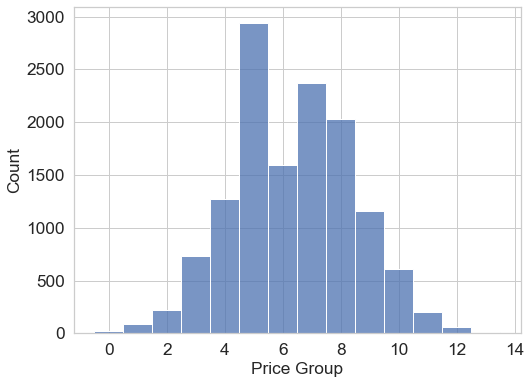

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price Group'])
plt.grid(True)

In [20]:
df.groupby(['Price Group', 'Negotiation Type']).size().unstack()

Negotiation Type,rent,sale
Price Group,,
0,14,7
1,53,36
2,95,123
3,448,281
4,719,556
5,1442,1501
6,952,647
7,1162,1206
8,1065,965


In [21]:
df.groupby(['Price Group', 'Negotiation Type']).head(1)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude,Price Group
0,930,220,47,2,2,1,1,False,False,False,False,Artur Alvim,rent,-23.543138,-46.479486,3
4,1300,410,55,2,2,1,1,True,False,False,False,Artur Alvim,rent,-23.525025,-46.482436,5
5,1170,0,50,2,2,1,1,False,False,False,False,Artur Alvim,rent,-23.548751,-46.477195,4
10,760,160,38,2,2,1,1,False,False,False,False,Artur Alvim,rent,-23.551850,-46.491169,2
14,1800,418,54,2,2,1,1,True,False,True,False,Belém,rent,-23.543955,-46.586619,6
21,2500,720,68,3,2,1,1,False,False,True,False,Belém,rent,-23.538163,-46.591505,7
32,3000,811,107,3,3,1,2,True,False,True,False,Belém,rent,-23.538767,-46.594706,8
33,6000,800,150,3,4,3,2,True,True,False,False,Belém,rent,-23.550987,-46.590908,9
121,700,0,30,1,2,1,1,False,False,False,False,Cidade Líder,rent,-23.573224,-46.481089,1
122,500,0,50,1,2,1,1,False,False,False,False,Cidade Líder,rent,-23.559095,-46.488160,0


In [22]:
# proportional of the groups in the entire dataset
df['Price Group'].value_counts() / len(df['Price Group'])

5     0.220929
7     0.177764
8     0.152391
6     0.120036
4     0.095714
9     0.086780
3     0.054726
10    0.045867
2     0.016365
11    0.015464
1     0.006681
12    0.004579
0     0.001576
13    0.001126
Name: Price Group, dtype: float64

### 3.2 Stratified Sampling

In [23]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Price Group'], random_state=27)

In [24]:
df_train.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude,Price Group
4229,6000,2200,165,3,2,1,2,True,False,True,False,Alto de Pinheiros,rent,-23.541829,-46.718899,9
649,1500,915,86,3,2,1,1,True,True,True,False,Vila Matilde,rent,-23.525410,-46.525949,5
6260,400000,560,50,2,2,1,1,True,False,True,False,Guaianazes,sale,-23.493276,-46.617289,7
4966,785000,550,67,2,2,1,1,False,False,True,False,Brooklin,sale,-23.618385,-46.684776,8
10344,1700,890,47,1,1,0,1,False,False,False,False,Santa Cecília,rent,0.000000,0.000000,6


In [25]:
df_train.shape

(10656, 16)

In [26]:
# proportional of the groups in the training set
df_train['Price Group'].value_counts() / len(df_train['Price Group'])

5     0.220908
7     0.177740
8     0.152402
6     0.120026
4     0.095721
9     0.086806
3     0.054711
10    0.045890
2     0.016329
11    0.015484
1     0.006663
12    0.004598
0     0.001595
13    0.001126
Name: Price Group, dtype: float64

In [27]:
df_test.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude,Price Group
12888,150000,100,48,2,1,0,1,False,False,False,False,José Bonifácio,sale,-23.555681,-46.431571,2
5855,585000,690,70,2,2,1,1,True,True,True,False,Tucuruvi,sale,-23.468685,-46.606646,7
11370,299628,350,69,3,2,1,2,True,False,True,False,Medeiros,sale,-23.179604,-46.996822,5
6723,235000,350,50,2,2,1,1,False,False,False,False,Vila Curuçá,sale,-23.507291,-46.424997,5
1887,2500,602,71,2,2,1,1,True,False,False,False,Lapa,rent,-23.533622,-46.704409,7


In [28]:
df_test.shape

(2665, 16)

In [29]:
# proportional of the groups in the test set
df_test['Price Group'].value_counts() / len(df_test['Price Group'])

5     0.221013
7     0.177861
8     0.152345
6     0.120075
4     0.095685
9     0.086679
3     0.054784
10    0.045779
2     0.016510
11    0.015385
1     0.006754
12    0.004503
0     0.001501
13    0.001126
Name: Price Group, dtype: float64

### 3.3 Saving the Datasets

In [30]:
# removing the attribute "Price Group"
df_train = df_train.drop(columns=['Price Group'])
df_test = df_test.drop(columns=['Price Group'])

In [31]:
df_train.to_csv('./datasets/sao-paulo-properties_train_sprint-1.csv', index=False)
df_test.to_csv('./datasets/sao-paulo-properties_test_sprint-1.csv', index=False)

## 4. Data Cleaning

In [32]:
df_train_clean = df_train.copy()

In [33]:
df_train_clean.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
4229,6000,2200,165,3,2,1,2,True,False,True,False,Alto de Pinheiros,rent,-23.541829,-46.718899
649,1500,915,86,3,2,1,1,True,True,True,False,Vila Matilde,rent,-23.525410,-46.525949
6260,400000,560,50,2,2,1,1,True,False,True,False,Guaianazes,sale,-23.493276,-46.617289
4966,785000,550,67,2,2,1,1,False,False,True,False,Brooklin,sale,-23.618385,-46.684776
10344,1700,890,47,1,1,0,1,False,False,False,False,Santa Cecília,rent,0.000000,0.000000


As we checked in the dataset description, the Condo value is filled with zero when it is unknown.

Also, there are missing Latitude and Longitude values.

A good estimative for these attributes would be the median values of other samples in the same District.

In [34]:
# Checking the median Condo by District
df_train_clean.groupby('District')[['Condo', 'Latitude', 'Longitude']].median().head()

,Condo,Latitude,Longitude
District,,,
Alto de Pinheiros,1200.0,-23.542629,-46.715501
Anhanguera,650.0,-23.660743,-46.686148
Aricanduva,330.0,-23.538514,-46.518194
Artur Alvim,140.0,-23.538515,-46.480723
Barra Funda,520.0,-23.524613,-46.658090


In [35]:
mask_na_condo = df_train_clean['Condo'].eq(0)
df_train_clean[mask_na_condo].head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
1859,1500,0,65,2,2,1,1,True,False,False,False,Lapa,rent,-23.522944,-46.699231
6435,198500,0,50,2,2,1,1,True,False,True,False,Lajeado,sale,-23.534887,-46.403105
5008,8039200,0,278,4,7,4,4,True,True,True,False,Vila Olimpia,sale,-23.596469,-46.680587
12776,260000,0,48,2,1,0,1,True,False,True,False,Ermelino Matarazzo,sale,-23.512543,-46.477098
12716,135000,0,45,2,1,0,1,False,False,False,False,Cidade Tiradentes,sale,-23.566472,-46.401413


In [36]:
mask_wrong_latitude = df_train_clean.eval('Latitude == 0 | Latitude > -23.36 | Latitude < -24.00')
df_train_clean[mask_wrong_latitude].head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
10344,1700,890,47,1,1,0,1,False,False,False,False,Santa Cecília,rent,0.0,0.0
8766,830000,1251,48,1,2,1,1,True,False,True,False,Itaim Bibi,sale,0.0,0.0
3608,2500,536,40,1,1,0,1,False,True,False,False,Itaim Bibi,rent,0.0,0.0
12924,234900,200,47,2,2,1,1,False,False,False,False,Parque do Carmo,sale,0.0,0.0
8178,1100000,1200,126,3,2,1,1,False,False,False,False,Bela Vista,sale,0.0,0.0


In [37]:
mask_wrong_longitude = df_train_clean.eval('Longitude == 0 | Longitude > -46.36 | Longitude < -46.84')
df_train_clean[mask_wrong_longitude].head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
10344,1700,890,47,1,1,0,1,False,False,False,False,Santa Cecília,rent,0.0,0.0
8766,830000,1251,48,1,2,1,1,True,False,True,False,Itaim Bibi,sale,0.0,0.0
3608,2500,536,40,1,1,0,1,False,True,False,False,Itaim Bibi,rent,0.0,0.0
12924,234900,200,47,2,2,1,1,False,False,False,False,Parque do Carmo,sale,0.0,0.0
8178,1100000,1200,126,3,2,1,1,False,False,False,False,Bela Vista,sale,0.0,0.0


In [38]:
# Inputing the median Condo to the missing rows
fill_vals = df_train_clean['Condo'].mask(mask_na_condo).groupby(df_train_clean['District']).transform(np.nanmedian)
df_train_clean = df_train_clean.assign(Condo = df_train_clean['Condo'].mask(mask_na_condo, fill_vals))

In [39]:
# Inputing the median Latitude to the wrong rows
fill_vals = df_train_clean['Latitude'].mask(mask_wrong_latitude).groupby(df_train_clean['District']).transform(np.nanmedian)
df_train_clean = df_train_clean.assign(Latitude = df_train_clean['Latitude'].mask(mask_wrong_latitude, fill_vals))

In [40]:
# Inputing the median Longitude to the wrong rows
fill_vals = df_train_clean['Longitude'].mask(mask_wrong_longitude).groupby(df_train_clean['District']).transform(np.nanmedian)
df_train_clean = df_train_clean.assign(Longitude = df_train_clean['Longitude'].mask(mask_wrong_longitude, fill_vals))

In [41]:
# Checking the new Condo values
df_train_clean[mask_na_condo].head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
1859,1500,769.0,65,2,2,1,1,True,False,False,False,Lapa,rent,-23.522944,-46.699231
6435,198500,227.5,50,2,2,1,1,True,False,True,False,Lajeado,sale,-23.534887,-46.403105
5008,8039200,1034.0,278,4,7,4,4,True,True,True,False,Vila Olimpia,sale,-23.596469,-46.680587
12776,260000,352.0,48,2,1,0,1,True,False,True,False,Ermelino Matarazzo,sale,-23.512543,-46.477098
12716,135000,140.0,45,2,1,0,1,False,False,False,False,Cidade Tiradentes,sale,-23.566472,-46.401413


In [42]:
# Checking the new Latitude values
df_train_clean[mask_wrong_latitude].head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
10344,1700,890.0,47,1,1,0,1,False,False,False,False,Santa Cecília,rent,-23.537651,-46.656300
8766,830000,1251.0,48,1,2,1,1,True,False,True,False,Itaim Bibi,sale,-23.583839,-46.676243
3608,2500,536.0,40,1,1,0,1,False,True,False,False,Itaim Bibi,rent,-23.583839,-46.676243
12924,234900,200.0,47,2,2,1,1,False,False,False,False,Parque do Carmo,sale,-23.568891,-46.469521
8178,1100000,1200.0,126,3,2,1,1,False,False,False,False,Bela Vista,sale,-23.557978,-46.647880


## 5. Explore the Data

### 5.1 Visualizing Geographical Data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


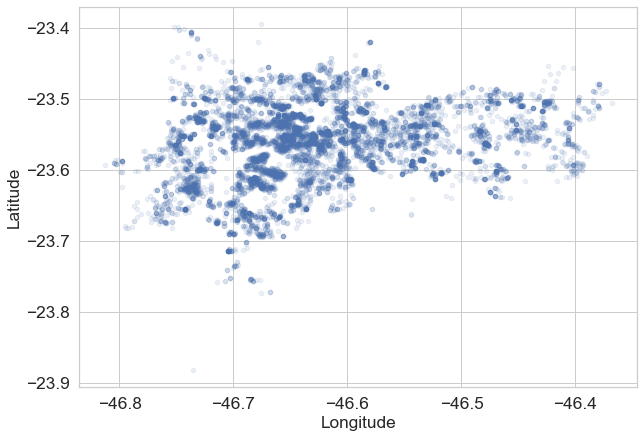

In [43]:
df_train_clean.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, figsize=(10, 7))
display()

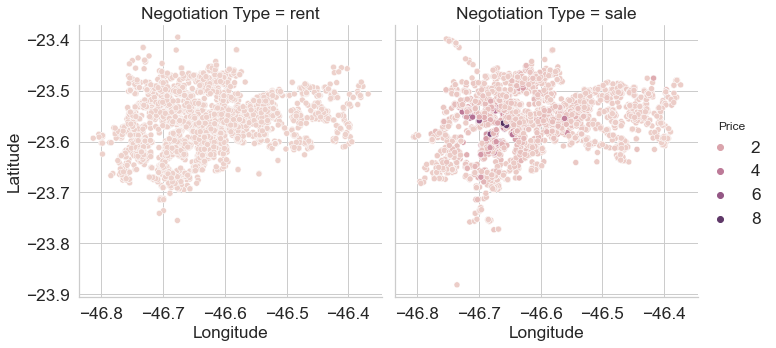

In [44]:
sns.relplot(kind="scatter", data=df_train_clean, x="Longitude", y="Latitude", col="Negotiation Type", hue="Price")
display()

### 5.2. Looking for Correlations
The **correlation coefficient** measures the _linear correlation_ between two variables. It ranges from –1 (perfect negative correlation)  to 1 (perfect positive correlation).

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2560px-Correlation_examples2.svg.png' width=800>

Source: https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2560px-Correlation_examples2.svg.png

Since the Price attribute is very different depending on the Negotiation Type, let's visualize them separately.

In [61]:
mask_sale = df_train_clean['Negotiation Type'].eq('sale')
mask_rent = df_train_clean['Negotiation Type'].eq('rent')

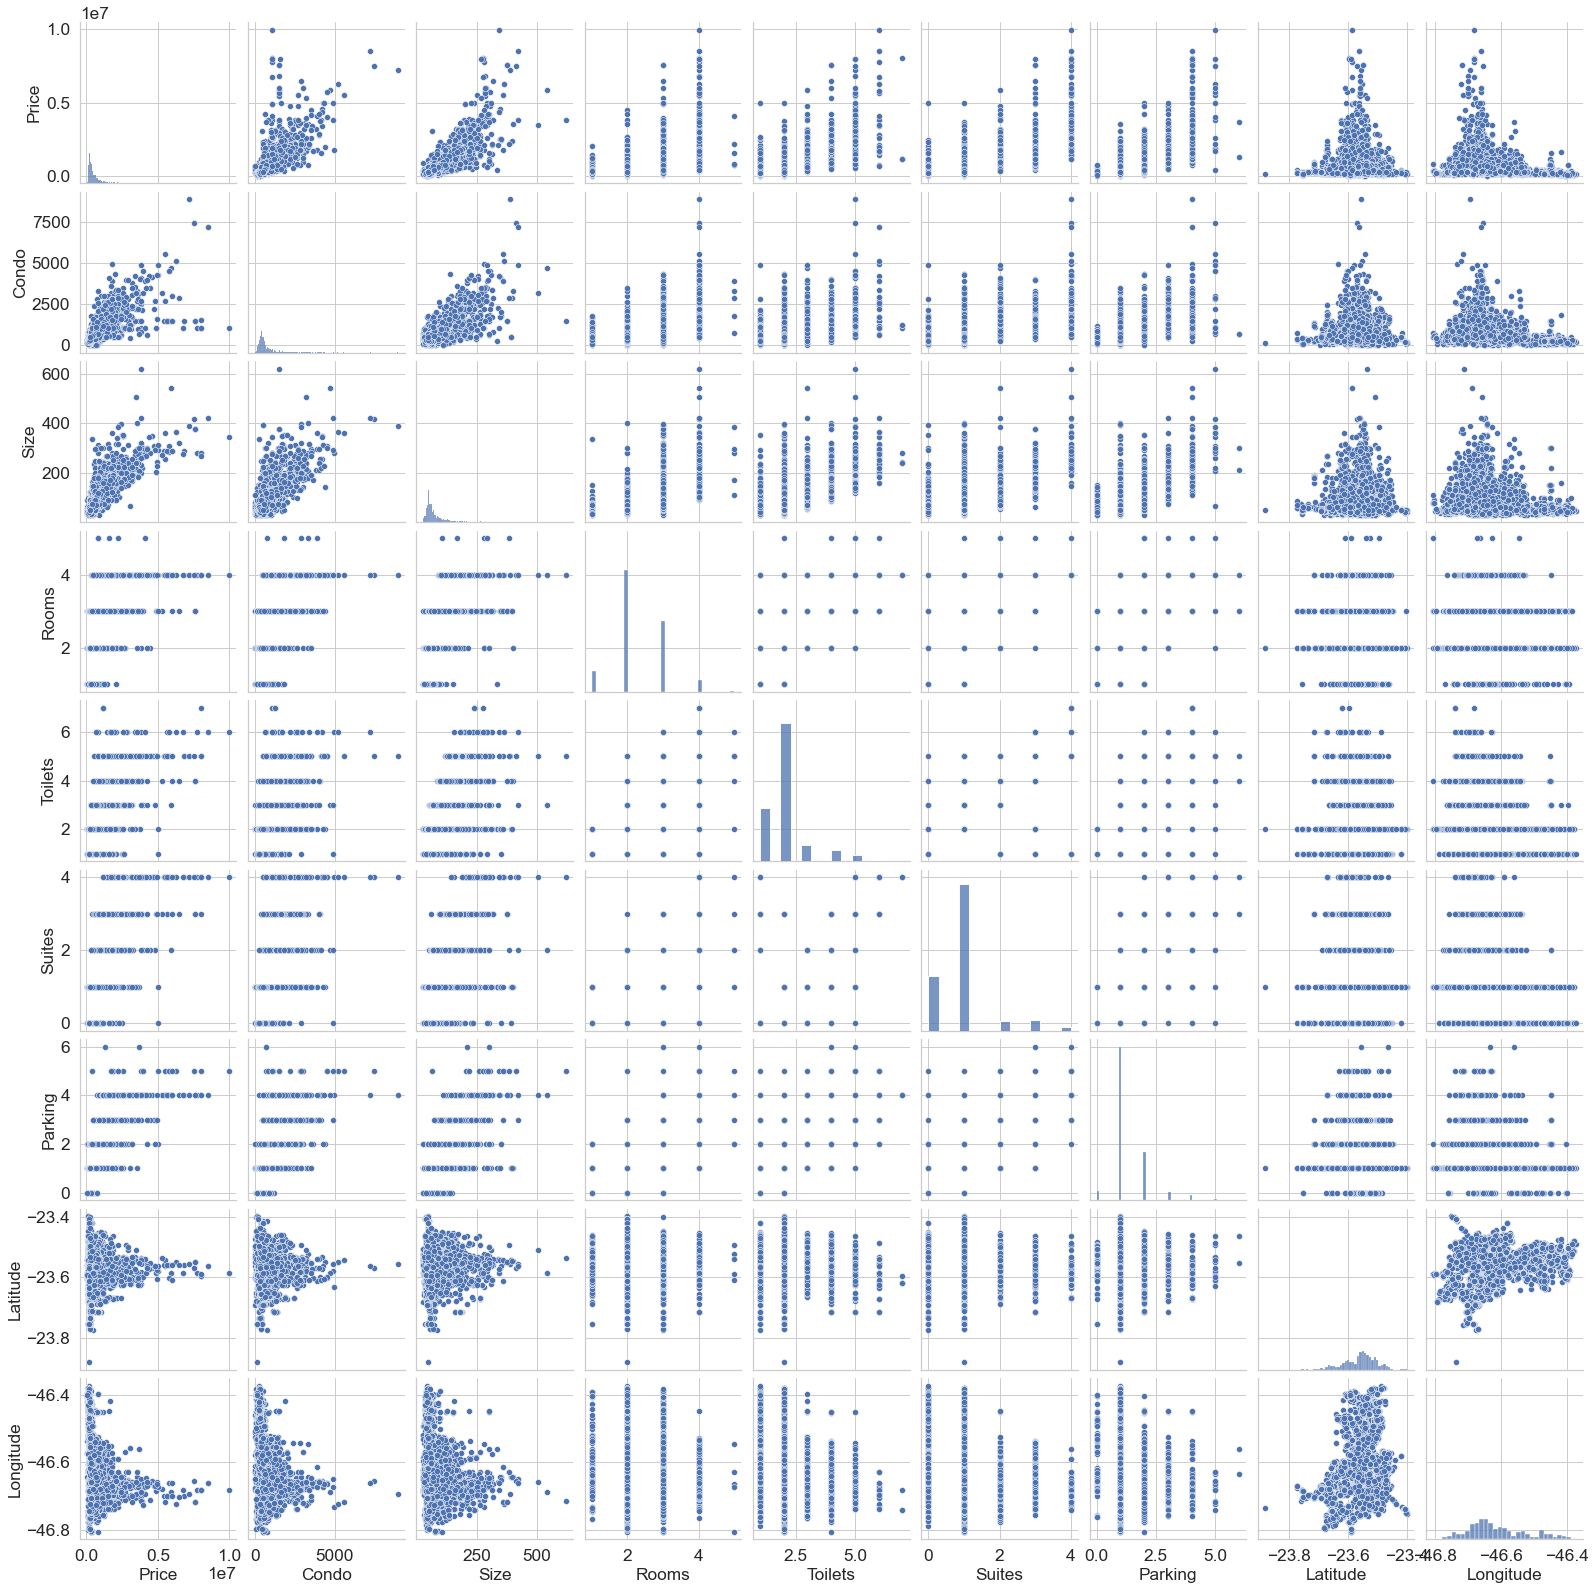

In [62]:
# 9 numeric attributes ==> 9 x 9 = 81 plots
sns.pairplot(data=df_train_clean[mask_sale].select_dtypes(include='number'))
display()

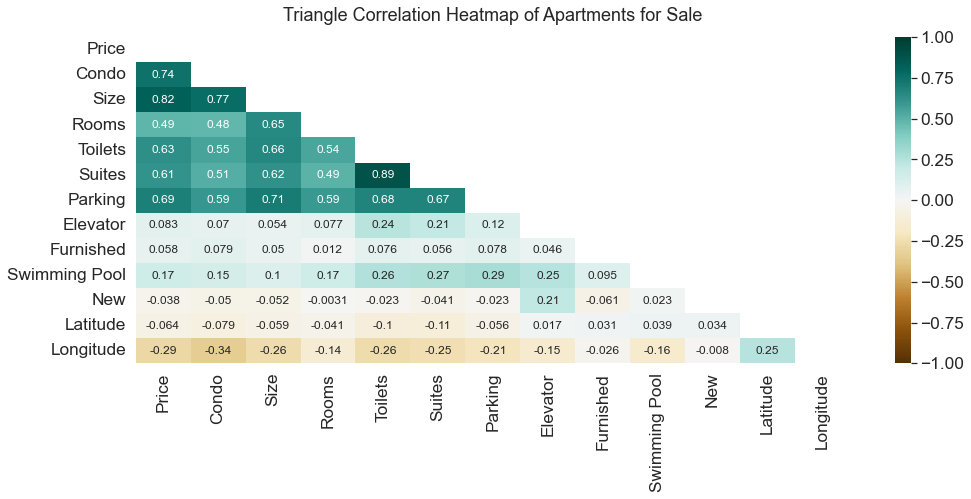

In [69]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train_clean[mask_sale].corr(), dtype='bool'))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(df_train_clean[mask_sale].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap of Apartments for Sale', fontdict={'fontsize':18}, pad=16);

In [65]:
df_train_clean[mask_sale].corr()["Price"].sort_values(ascending=False)

Price            1.000000
Size             0.824281
Condo            0.744623
Parking          0.688795
Toilets          0.626799
Suites           0.610914
Rooms            0.486552
Swimming Pool    0.168757
Elevator         0.082714
Furnished        0.058318
New             -0.038169
Latitude        -0.064284
Longitude       -0.287771
Name: Price, dtype: float64

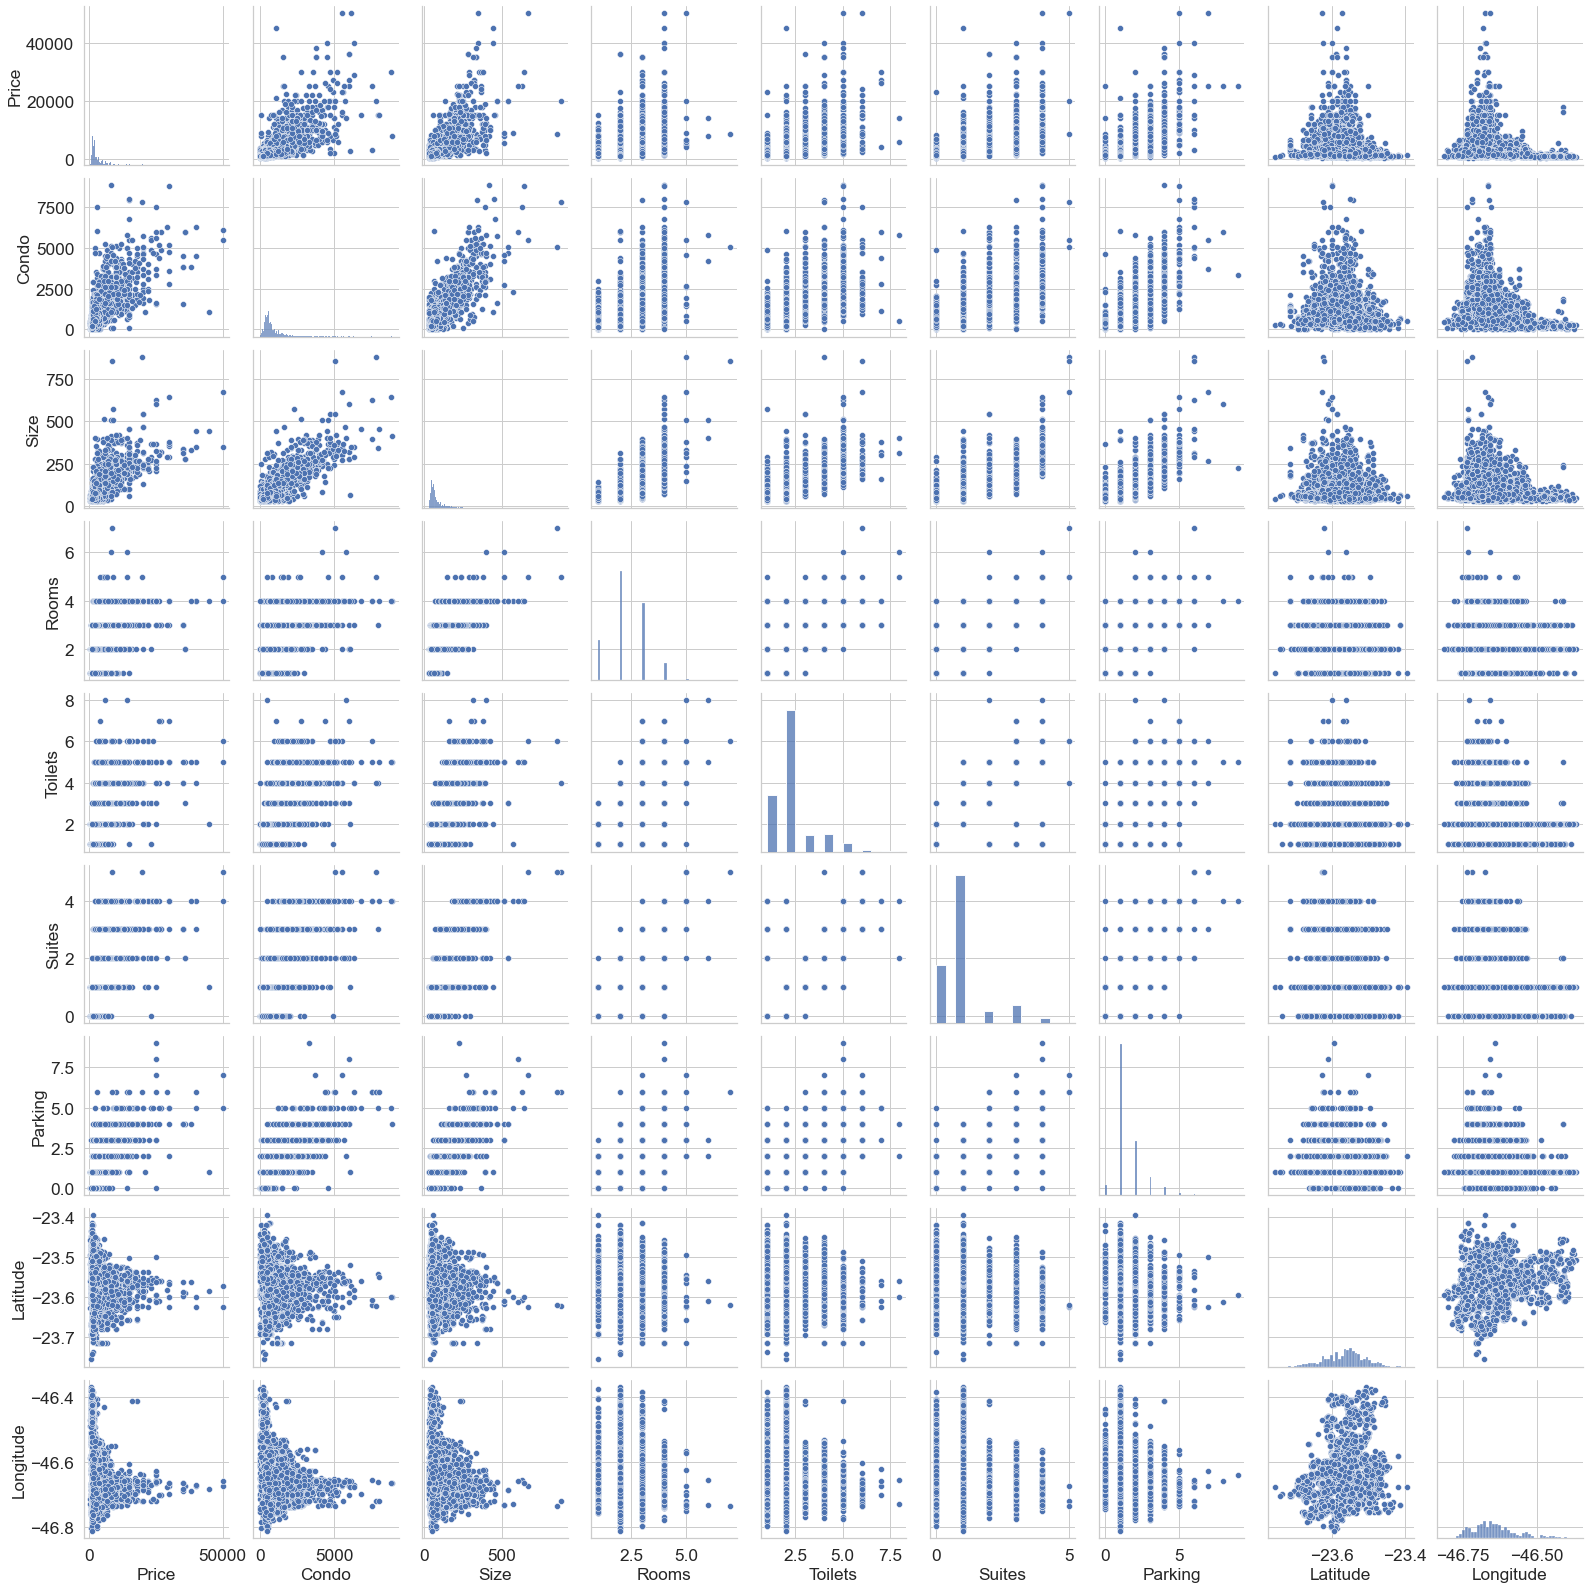

In [66]:
# 9 numeric attributes ==> 9 x 9 = 81 plots
sns.pairplot(data=df_train_clean[mask_rent].select_dtypes(include='number'))
display()

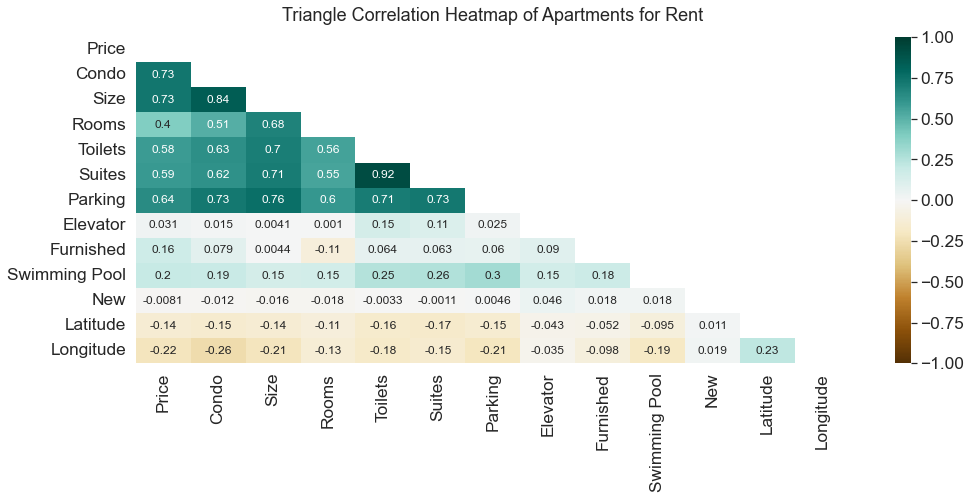

In [70]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train_clean[mask_rent].corr(), dtype='bool'))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(df_train_clean[mask_rent].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap of Apartments for Rent', fontdict={'fontsize':18}, pad=16);

In [71]:
df_train_clean[mask_rent].corr()["Price"].sort_values(ascending=False)

Price            1.000000
Size             0.731041
Condo            0.730616
Parking          0.644991
Suites           0.586416
Toilets          0.582120
Rooms            0.396952
Swimming Pool    0.202191
Furnished        0.164984
Elevator         0.030796
New             -0.008140
Latitude        -0.138739
Longitude       -0.215496
Name: Price, dtype: float64

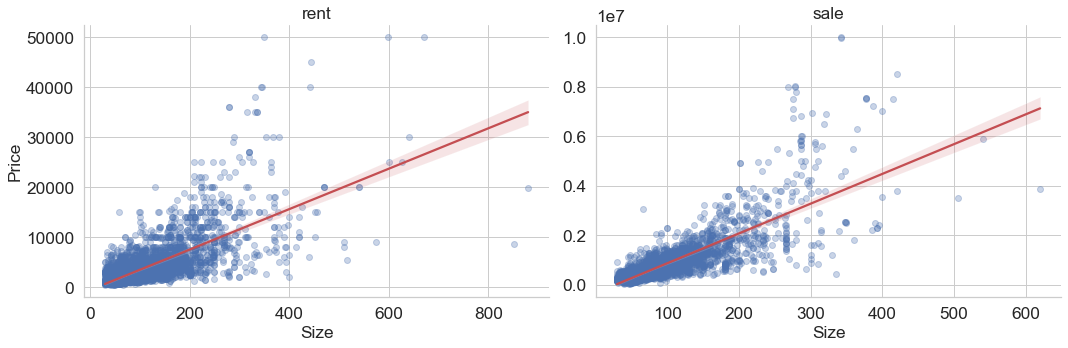

In [98]:
grid = sns.FacetGrid(df, col='Negotiation Type', sharex=False, sharey=False, height=5, aspect=1.5)
plot = grid.map_dataframe(sns.regplot, x='Size', y="Price", scatter_kws={'alpha': 0.3}, line_kws={'color': 'r'})
plot.set_titles("{col_name}")
display()

In [74]:
### 5.3. Data distribution

In [75]:
numeric_attributes = df_train_clean.select_dtypes(include='number').columns
numeric_attributes

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Latitude', 'Longitude'],
      dtype='object')

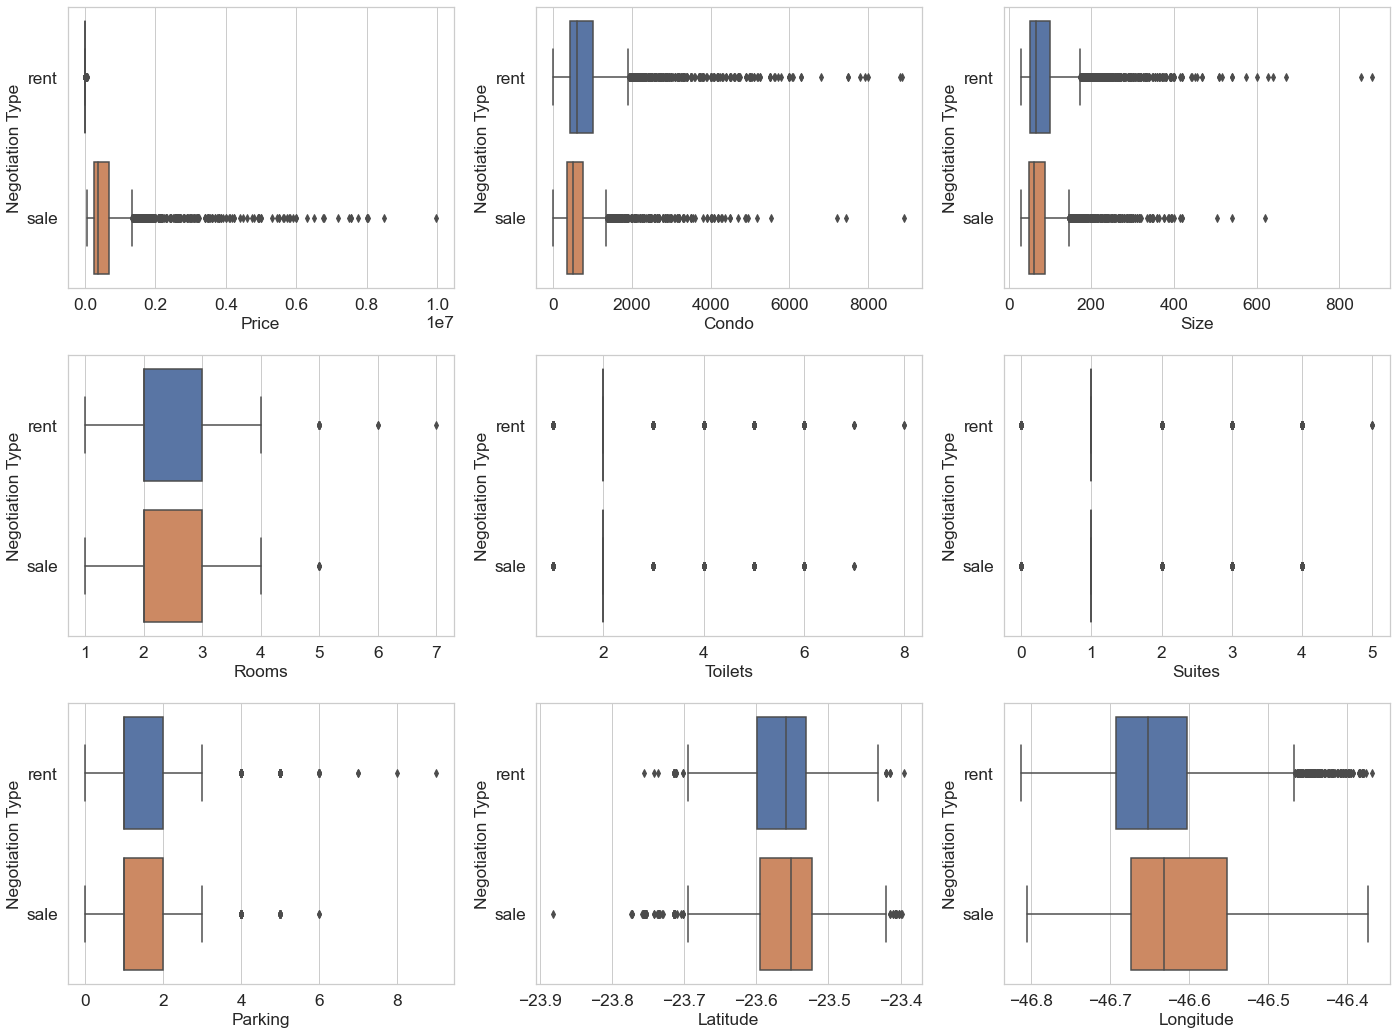

In [82]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.tight_layout(pad=3.0)

for i, attr in enumerate(numeric_attributes):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df_train_clean, x=attr, y="Negotiation Type", ax=axes[row, col])